

**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


# Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.

Crearemos un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. 

Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Para ello creareos un modelo en Keras haciendo uso del conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando
(www.zalando.com), una tienda de moda online alemana especializada en ventas de
ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10
categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución
(28 x 28 píxeles):
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
  </td></tr>
</table>


# Conceptos básicos

**Optimizadores**: 

Un optimizador es una función o un algoritmo que modifica los atributos de la red neuronal, como los pesos y la tasa de aprendizaje. Por lo tanto, ayuda a reducir la pérdida general y mejorar la precisión. Vamos a trabajar con distintos optimizadores, para así estudiar el comportamiento y la diferencia entre ellos: 

   

*   *SGD*:(Descenso del gradiante estocástico)
    * El término estocástico significa aleatoriedad en la que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de tomar todo el conjunto de datos para cada iteración, seleccionamos aleatoriamente los lotes de datos. 
Eso significa que solo tomamos algunas muestras del conjunto de datos. Dado que no estamos utilizando todo el conjunto de datos, sino los lotes para cada iteración, la ruta tomada por el algoritmo está llena de ruido en comparación con el algoritmo de descenso de gradiente. Por lo tanto, SGD utiliza un mayor número de iteraciones para alcanzar los mínimos locales. Debido a un aumento en el número de iteraciones, el tiempo total de cálculo aumenta.

*   *RMSPROP*: 
    * Utiliza el signo del gradiente adaptando el tamaño del paso individualmente para cada peso. En este algoritmo, los dos gradientes se comparan primero en busca de signos. Si tienen el mismo signo, vamos en la dirección correcta y, por lo tanto, aumentamos el tamaño del paso en una pequeña fracción. Mientras que, si tienen signos opuestos, debemos disminuir el tamaño del paso. Luego limitamos el tamaño del paso, y ahora podemos optar por la actualización del peso.

*   *ADAM*: 
    * Hace uso de impulso y tasas de aprendizaje adaptativo para converger más rápido. Los resultados del optimizador de Adam son generalmente mejores que cualquier otro algoritmo de optimización, tienen un tiempo de cálculo más rápido y requieren menos parámetros para el ajuste.


<br />

**Función de activación**: 

Esta función define la salida de una capa según la entrada o las entradas que se va a recibir.

*   *RELU*: (unidad lineal rectificada) 
    * Es capaz de acelerar la velocidad de entrenamiento de las redes neuronales profundas en comparación con las funciones de activación tradicionales, ya que la derivada de ReLu es 1 para una entrada positiva. (Pone a cero los valores negativos). Por ello la usaremos como función de activación en la primera capa.

*   *SIGMOID*:

*   *SOFTMAX*: 
    * Se utiliza en la capa de salida para predecir una distribución de problabilidad multinomial







# Importamos librerías y datos

Se importa Keras

In [22]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


Cargamos los datos que se van a estar utilizando. Se debe diferenciar entre los datos de entrenamiento y de prueba. Es importante saber que sólo se deben utilizar los datos de prueba para las pruebas, no podemos dejar que esos datos contaminen la red neuronal, esta solo debe aprender con los datos de entrenamiento.

In [23]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Análisis de datos

Comprobamos las dimensiones de los datos proporcionados:

In [24]:
print(train_images.shape)

(60000, 28, 28)


Siguiendo las instrucciones del ejercicio, usaremos 60.000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [25]:
len(train_labels)


60000

In [26]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 1001:

In [27]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

[[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 155 172 182 180 161 182 127   

Se puede asemejar a un pantalón, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [28]:
train_labels[1000]


1

Probamos otra manera de representar la imagen. 

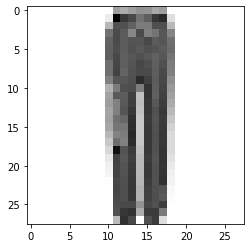

In [30]:
import matplotlib.pyplot as plt
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Analizamos cómo están distribuidos los datos.

A la hora de dividirlos en aquellos que usaremos para entrenar la red neuronal, idealmente querríamos una buena distribución de las imágenes de forma que haya un porcentaje similar de cada tipo de prenda, para ambos lotes. 

Si no estuviesen distribuidas de forma aceptable, no podríamos separar los datos de forma aleatoria.

In [31]:
cont=0
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
for i in train_labels:
  if i==0:
    cont=cont+1
  elif i==1:
    cont1=cont1+1
  elif i==2:
    cont2=cont2+1
  elif i==3:
    cont3=cont3+1
  elif i==4:
    cont4=cont4+1
  elif i==5:
    cont5=cont5+1
  elif i==6:
    cont6=cont6+1
  elif i==7:
    cont7=cont7+1
  elif i==8:
    cont8=cont8+1
  elif i==9:
    cont9=cont9+1
print(cont,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9)

6000 6000 6000 6000 6000 6000 6000 6000 6000 6000


Tenemos 6.000 imágenes de cada tipo de ropa, en los datos de entrenamiento, un 10% de cada etiqueta, por lo que podemos decir que están bien distribuidos y podemos proceder a crear cada una de las redes neuronales que se necesitarán.

# Preparación de datos


Normalizamos las imágenes, y las representamos, para verificar que se ha realizado correctamente. 
Lo primero que se debe hacer es cambiar la dimensión de las imágenes para que pasen de ser una matriz a un vector. Una vez se ha cambiado la dimensión de las imágenes se necesita normalizar cada uno de los elementos de los vectores que representan los datos de cada imagen de entrenamiento.

In [32]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.33 0.38 0.43 0.42 0.34 0.38 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 1.   0.78 0.72 0.56 0.63 0.78 0.84 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.28 0.68 0.68 0.62 0.51 0.52 0.69 0.69 0.27 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.71 0.64 0.47 0.71 0.49 0.55 0.66 0.48 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.71 0.64 0.67 0.67 0.72 0.64 0.66 0.56 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.62 0.69 0.64 0.68 0.65 0.68 0.67 0.64 0.58 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.71 0.63 0.66 0.69 0.65 0.62 0.66 0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.
 

Gracias al término one hot enconding, cambiamos el formato de las etiquetas. Lo que encontramos ahora es un vector de 10 bits, con todos los valores en 0, excepto un bit cuyo valor sea 1 cuya posición nos indicará a qué clase de ropa pertenece la imagen. 


In [33]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Casos

## Caso 1

Procedemos a crear el primer modelo.
Lo primero que determinamos es que se va a tratar de un modelo secuencial, es decir, irá pasando de capa en capa sin volver hacia atrás.
Tras esto, añadimos las capas que se nos han pedido, estas capas serán densas ya que conectarán cada neurona de una capa con todas las neuronas de la capa posterior.
La primera capa será una capa de 10 neuronas cuya función de activación será 'Relu'.
En la última capa debido a que se debe a una red neuronal de clasificación multiclase debemos crear una capa con 10 neuronas, debido a que este es el número de clases que tenemos y además debemos utilizar la función de activación softmax que nos devolverá valores de probabilidad de que esa imagen introducida pertenezca a cada una de las clases posibles.

In [35]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Procedemos a observar un diagrama que represente las capas con las que se está trabajando. En este caso, en la primera capa le entra un vector de tamaño 784 

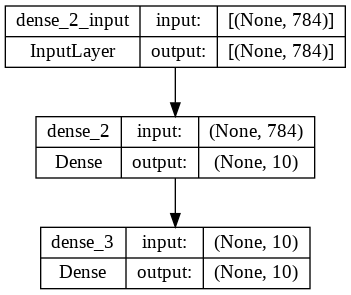

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

A continuación, marcamos el optimizador que utilizaremos, en este caso basado en el descenso estocástico del gradiente, la función de pérdida que será categórica debido a que estamos clasificando en categorías y la métrica a utilizar que será la precisión.

In [37]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Procedemos a entrenar la red con los datos de entrenamiento y a su vez queremos ver la pérdida de validación, en la cual usamos los datos de entrenamiento y la precisión de esos datos de validación.
En este caso el número de épocas será 5 y el batch_size utilizado 128, es decir actualizará los pesos de la red neuronal cada vez que pase un lote de 128 imágenes de entrenamiento por la red neuronal

In [ ]:
# Dividimos los datos de entrenamiento entre detos de validación y datos de entrenamiento y de igual forma con las etiquetas
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [39]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6023 - accuracy: 0.7951 - val_loss: 0.6121 - val_accuracy: 0.7862
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5811 - accuracy: 0.8026 - val_loss: 0.5947 - val_accuracy: 0.7952
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5641 - accuracy: 0.8099 - val_loss: 0.5812 - val_accuracy: 0.8017
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5495 - accuracy: 0.8145 - val_loss: 0.5673 - val_accuracy: 0.8060
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5373 - accuracy: 0.8197 - val_loss: 0.5606 - val_accuracy: 0.8068


Por último, realizamos una gráfica en la que enfrentamos el número de épocas con los datos de pérdida tanto de validación, como de entrenamiento, con el fin de saber el número adecuado de épocas para no sobre entrenar el modelo.

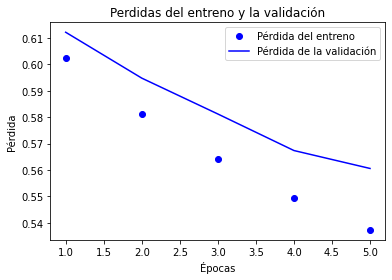

In [41]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Para el resto de modelos realizaremos el mismo procedimiento seguido en este caso para la creación de la red neuronal.

## Caso 2

In [42]:
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


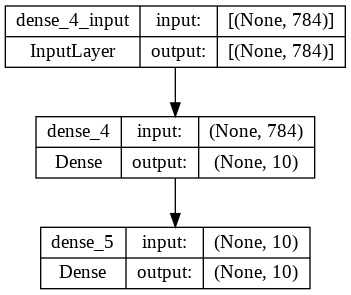

In [43]:
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [46]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [47]:
history = network2.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8495 - accuracy: 0.7076 - val_loss: 0.5877 - val_accuracy: 0.7982
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5326 - accuracy: 0.8194 - val_loss: 0.5220 - val_accuracy: 0.8208
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4837 - accuracy: 0.8339 - val_loss: 0.4970 - val_accuracy: 0.8287
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4587 - accuracy: 0.8421 - val_loss: 0.4954 - val_accuracy: 0.8283
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4442 - accuracy: 0.8460 - val_loss: 0.4689 - val_accuracy: 0.8386


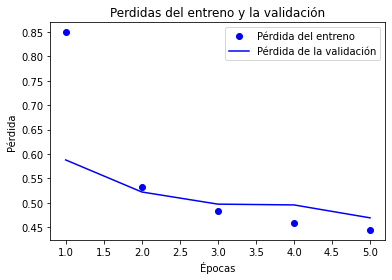

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 2.2

In [49]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))
network22.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


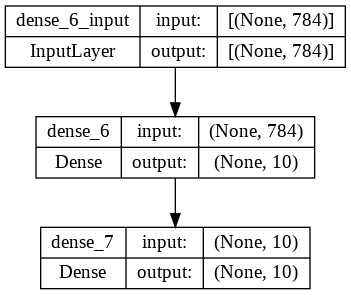

In [50]:
keras.utils.plot_model(network22, "my_first_model.png", show_shapes=True)

In [51]:
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

En este modelo vamos a implementar una diferencia respecto a los modelos anteriores que se basará en el número de épocas, en este caso, será 25 y nos servirá para hacer una comparativa con el caso del modelo 2.

In [58]:
history = network22.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4234 - accuracy: 0.8518 - val_loss: 0.4651 - val_accuracy: 0.8347
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4153 - accuracy: 0.8556 - val_loss: 0.4485 - val_accuracy: 0.8402
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4085 - accuracy: 0.8576 - val_loss: 0.4634 - val_accuracy: 0.8370
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8598 - val_loss: 0.4407 - val_accuracy: 0.8443
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3986 - accuracy: 0.8609 - val_loss: 0.4333 - val_accuracy: 0.8467
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3943 - accuracy: 0.8628 - val_loss: 0.4423 - val_accuracy: 0.8467
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3904 - accuracy: 0.8641 - val_loss: 0.4500 - val_accuracy: 0.8375
Epoch 

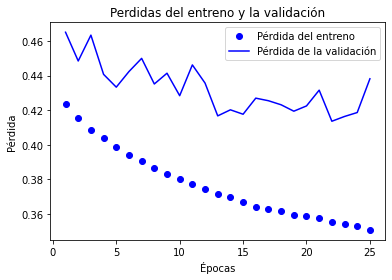

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

###Comparación modelos 2 y 2.2


## Caso 3

In [54]:
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


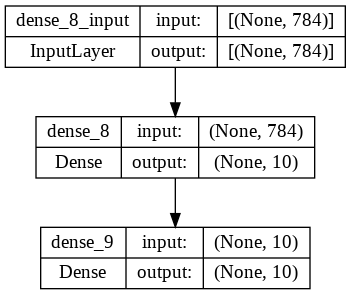

In [55]:
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [56]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [60]:
history = network3.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.2250 - accuracy: 0.6621 - val_loss: 1.1874 - val_accuracy: 0.6644
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1431 - accuracy: 0.6725 - val_loss: 1.1151 - val_accuracy: 0.6704
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 1.0771 - accuracy: 0.6813 - val_loss: 1.0565 - val_accuracy: 0.6775
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0231 - accuracy: 0.6902 - val_loss: 1.0080 - val_accuracy: 0.6852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.9782 - accuracy: 0.6960 - val_loss: 0.9677 - val_accuracy: 0.6948


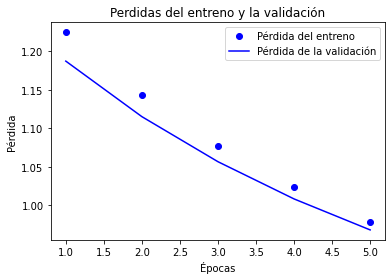

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Caso 3.2 

**Keras flatten** aplana la entrada sin afectar el tamaño del lote. Se utiliza cuando se trata de cualquiera de los tensores multidimensionales que consisten en conjuntos de datos de imágenes y conjuntos de datos de múltiples capas que no permiten perder ninguna información de los mismos.

El método layer.flatten() se utiliza para convertir una matriz multidimensional en una matriz plana unidimensional o, por ejemplo, una matriz unidimensional.

Ninguna de las dimensiones del lote se incluye como parte de keras.layer.flatten, donde la noción simple es la alimentación de la entrada como multidimensional y la salida esperada como una matriz unidimensional.

Observamos como implementarla en el caso 3: 

Este modelo es un poco diferente al resto de modelos, en primer lugar porque se va a utilizar la función keras.layes.flatten que permite introducir las imágenes en la red neuronal sin necesidad de cambiar las dimensiones de las imágenes ya que será es primera capa la que se encargará de cambiar la dimensión de los datos de entrada para adecuarlos al modelo.

Además, otra diferencia es que no debemos normalizar ni las imágenes ni las etiquetas, ya que utilizaremos una función de pérdida que es sparse_categorigal_crosentropy que trabaja con los datos iniciales y no con los datos normalizados. Esto también se debe al uso de un nuevo optimizador que es 'Adam'.

In [62]:
network32= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 
network32.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


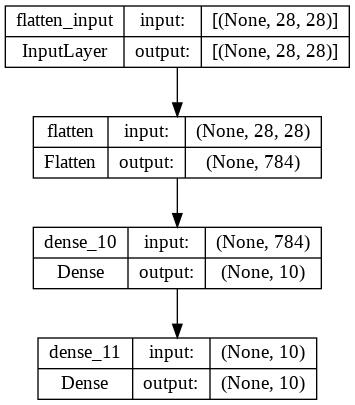

In [63]:
keras.utils.plot_model(network32, "my_first_model.png", show_shapes=True)

In [64]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Volvemos a importar los datos ya que los queremos en su forma inicial

In [119]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [120]:
history = network32.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.9517 - accuracy: 0.4463 - val_loss: 1.9562 - val_accuracy: 0.0000e+00
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.8658 - accuracy: 0.0569 - val_loss: 1.7456 - val_accuracy: 0.7211
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 1.6781 - accuracy: 0.3530 - val_loss: 1.6605 - val_accuracy: 0.0000e+00
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 1.6228 - accuracy: 0.2969 - val_loss: 1.6146 - val_accuracy: 0.0000e+00
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 1.5799 - accuracy: 0.1645 - val_loss: 1.5411 - val_accuracy: 0.0000e+00


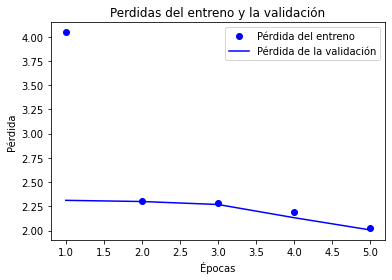

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 4

In [121]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

DSDSAFASDFAS

In [122]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [71]:
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


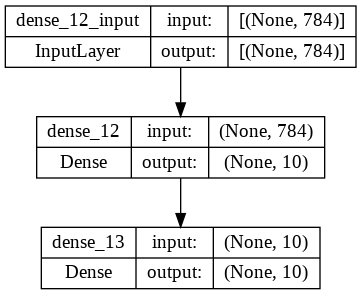

In [72]:
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [73]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [74]:
history = network4.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3908 - accuracy: 0.6514 - val_loss: 1.0468 - val_accuracy: 0.7372
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8607 - accuracy: 0.7726 - val_loss: 0.7485 - val_accuracy: 0.7732
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6545 - accuracy: 0.7996 - val_loss: 0.6188 - val_accuracy: 0.7996
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5587 - accuracy: 0.8207 - val_loss: 0.5525 - val_accuracy: 0.8141
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.8322 - val_loss: 0.5155 - val_accuracy: 0.8242


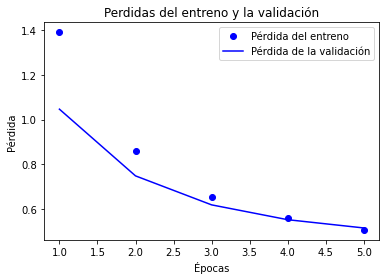

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 5

Los modelos creados a continuación se diferencian de los modelos creados anteriormente en la primera capa, ya que en este caso será una primera capa que estará formada por 512 neuronas.

In [76]:
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


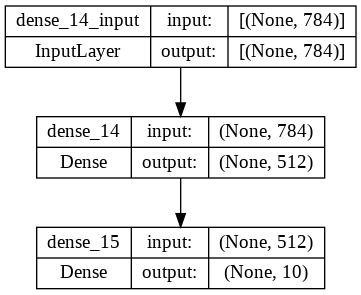

In [77]:
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [78]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [79]:
history = network5.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 1.0303 - accuracy: 0.6914 - val_loss: 0.7412 - val_accuracy: 0.7588
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6583 - accuracy: 0.7918 - val_loss: 0.6301 - val_accuracy: 0.7879
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.5809 - accuracy: 0.8117 - val_loss: 0.5764 - val_accuracy: 0.8091
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5399 - accuracy: 0.8222 - val_loss: 0.5488 - val_accuracy: 0.8138
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.5135 - accuracy: 0.8294 - val_loss: 0.5284 - val_accuracy: 0.8194


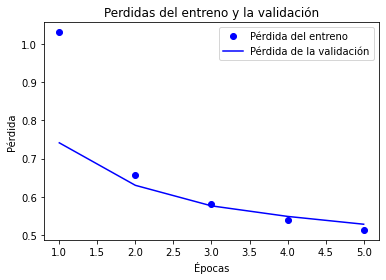

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 6

In [82]:
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


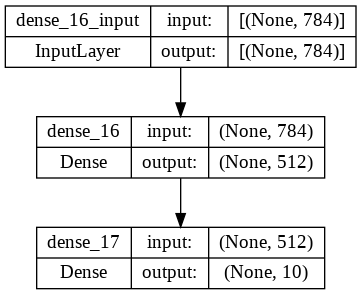

In [83]:
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [84]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [85]:
history = network6.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.5582 - accuracy: 0.8041 - val_loss: 0.4452 - val_accuracy: 0.8402
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3767 - accuracy: 0.8608 - val_loss: 0.3984 - val_accuracy: 0.8520
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3359 - accuracy: 0.8774 - val_loss: 0.4134 - val_accuracy: 0.8509
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3104 - accuracy: 0.8856 - val_loss: 0.3744 - val_accuracy: 0.8651
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2906 - accuracy: 0.8935 - val_loss: 0.3840 - val_accuracy: 0.8676


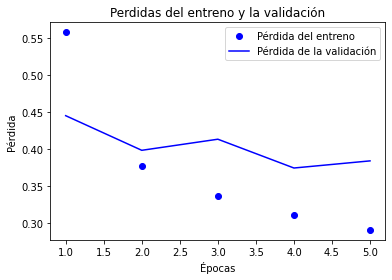

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 7

In [127]:
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 dense_27 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


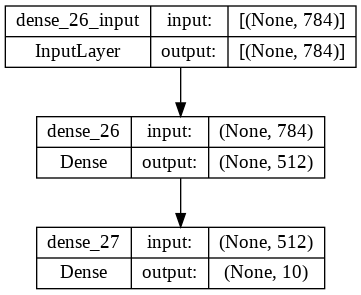

In [128]:
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [131]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [133]:
history = network7.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
461/461 [==============================] - 6s 11ms/step - loss: 1.6933 - accuracy: 0.5900 - val_loss: 1.2942 - val_accuracy: 0.7180
Epoch 2/5
461/461 [==============================] - 4s 9ms/step - loss: 1.1347 - accuracy: 0.7050 - val_loss: 0.9933 - val_accuracy: 0.7330
Epoch 3/5
461/461 [==============================] - 4s 10ms/step - loss: 0.9318 - accuracy: 0.7262 - val_loss: 0.8608 - val_accuracy: 0.7550
Epoch 4/5
461/461 [==============================] - 4s 9ms/step - loss: 0.8297 - accuracy: 0.7404 - val_loss: 0.7864 - val_accuracy: 0.7620
Epoch 5/5
461/461 [==============================] - 4s 9ms/step - loss: 0.7676 - accuracy: 0.7504 - val_loss: 0.7347 - val_accuracy: 0.7690


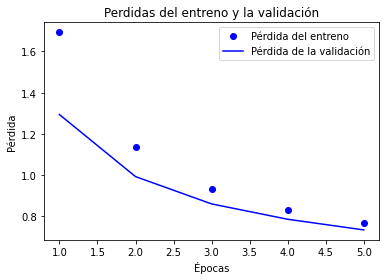

In [134]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Caso 7.2

En este caso al igual que en el 2.2 aumentaremos el número de épocas a la hora de entrenar la red para hacer una comparativa con el modelo original.

In [92]:
network72 = models.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))
network72.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


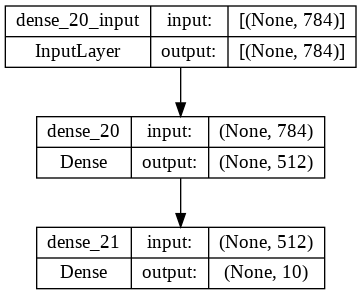

In [93]:
keras.utils.plot_model(network72, "my_first_model.png", show_shapes=True)

In [94]:
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [95]:
history = network72.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 1.7163 - accuracy: 0.5817 - val_loss: 1.3249 - val_accuracy: 0.6905
Epoch 2/25
469/469 [==============================] - 5s 11ms/step - loss: 1.1402 - accuracy: 0.7075 - val_loss: 1.0133 - val_accuracy: 0.7171
Epoch 3/25
469/469 [==============================] - 5s 10ms/step - loss: 0.9301 - accuracy: 0.7286 - val_loss: 0.8785 - val_accuracy: 0.7316
Epoch 4/25
469/469 [==============================] - 5s 11ms/step - loss: 0.8269 - accuracy: 0.7404 - val_loss: 0.8012 - val_accuracy: 0.7396
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7648 - accuracy: 0.7507 - val_loss: 0.7521 - val_accuracy: 0.7519
Epoch 6/25
469/469 [==============================] - 5s 10ms/step - loss: 0.7228 - accuracy: 0.7591 - val_loss: 0.7183 - val_accuracy: 0.7563
Epoch 7/25
469/469 [==============================] - 5s 10ms/step - loss: 0.6916 - accuracy: 0.7656 - val_loss: 0.6911 - val_accuracy: 0.7609


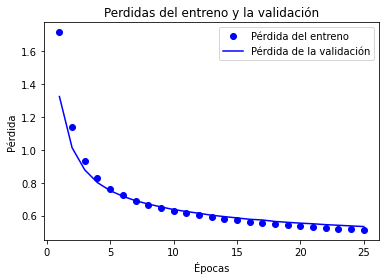

In [96]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 8

In [97]:
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


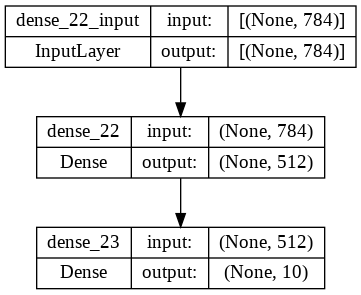

In [98]:
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [99]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [101]:
history = network8.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 8s 13ms/step - loss: 0.5879 - accuracy: 0.7922 - val_loss: 0.5736 - val_accuracy: 0.7887
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.4258 - accuracy: 0.8450 - val_loss: 0.4552 - val_accuracy: 0.8315
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3857 - accuracy: 0.8593 - val_loss: 0.4099 - val_accuracy: 0.8539
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3589 - accuracy: 0.8678 - val_loss: 0.3828 - val_accuracy: 0.8645
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3384 - accuracy: 0.8766 - val_loss: 0.3740 - val_accuracy: 0.8671


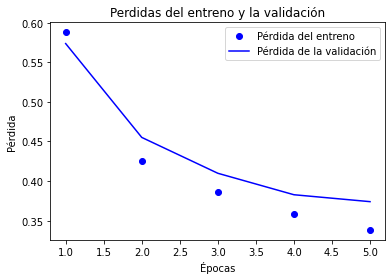

In [102]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Comparación predicción resultados imagen test 6

Tras haber realizado todos los modelos que se necesitan, vamos a proceder a estudiar las predicciones que realizan cada uno de nuestros 8 modelos, con el fin de saber como de buenos son cada uno de nuestros modelos.

In [103]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [107]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos a tomar la imagen de test 6 con el fin de ver como predice cada uno de nuestros modelos la imagen, para ello crearemos un gráfico de barras en el cuál se represente el vector de datos de salida que se obtiene tras introducir la imagen en cada una de las redes.

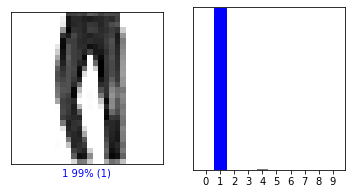

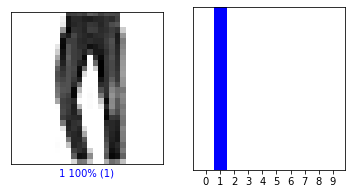

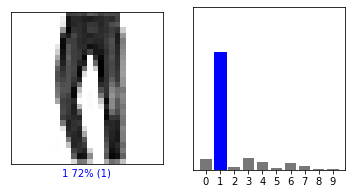

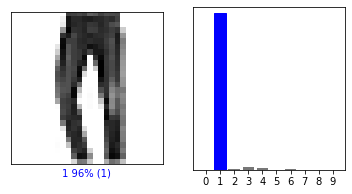

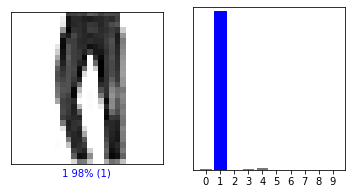

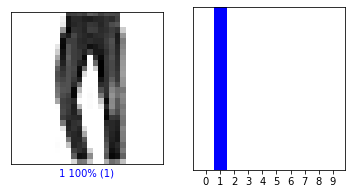

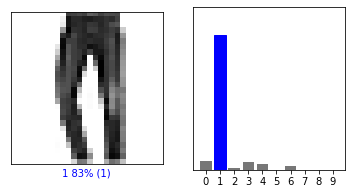

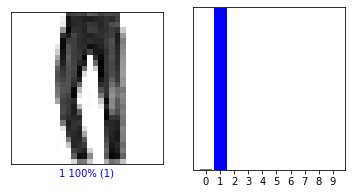

In [108]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()

Viendo las predicciones realizadas por todos los modelos para la imagen número 6, vemos que todos los modelos predicen que esa imagen es un 1, etiqueta que simboliza los pantalones.
A pesar de que todos los modelos predicen correctamente la etiqueta, no todos los modelos la predicen de la misma manera, los modelos 1,2,4,5,6,8 tienen un valor en la posición 1 del vector de salida un número superior al 0.95 lo que da un porcentaje muy fiable de que esa imagen sea un pantalón.
En cambio, los modelos 3 y 7 tiene un número relativamente bajo de que esa imagen sea un pantalon, ambas inferiores al 0.9.
Por tanto, para esta imagen podemos asegurar que los modelos 3 y 7 no son muy buenos.

##Conclusiones finales

Para poder realizar un ánalisis mejor de cada uno de los modelos y conocer para que clases los modelos son mejores y para que imagenes fallan más, vamos a realizar la matriz de confusión de cada uno de los 8 modelos.

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================


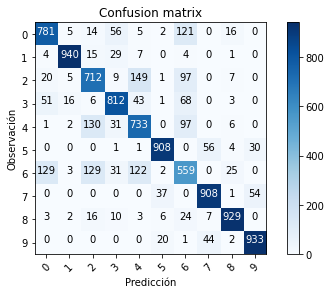

In [110]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================


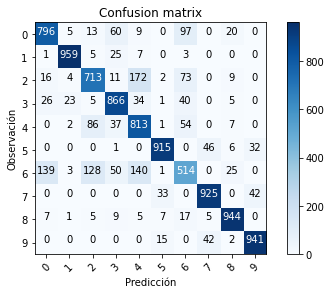

In [111]:
Y_pred_classes2 = np.argmax(predictions2, axis = 1) 
Y_true2 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================")
plot_confusion_matrix(confusion_mtx2, classes = range(10)) 

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================


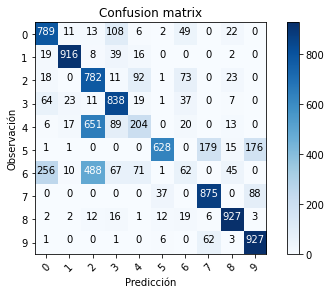

In [112]:
Y_pred_classes3 = np.argmax(predictions3, axis = 1) 
Y_true3 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================")
plot_confusion_matrix(confusion_mtx3, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================


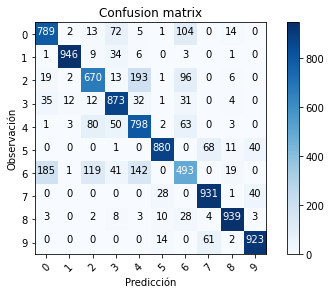

In [113]:
Y_pred_classes4 = np.argmax(predictions4, axis = 1) 
Y_true4 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================")
plot_confusion_matrix(confusion_mtx4, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================


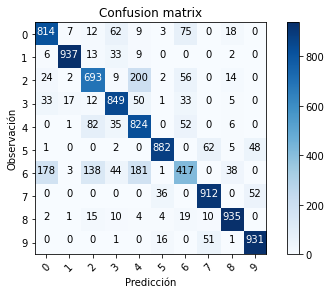

In [114]:
Y_pred_classes5 = np.argmax(predictions5, axis = 1) 
Y_true5 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx5 = confusion_matrix(Y_true5, Y_pred_classes5) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================")
plot_confusion_matrix(confusion_mtx5, classes = range(10)) 

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================


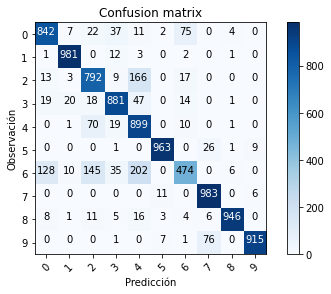

In [115]:
Y_pred_classes6 = np.argmax(predictions6, axis = 1) 
Y_true6 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx6 = confusion_matrix(Y_true6, Y_pred_classes6) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================")
plot_confusion_matrix(confusion_mtx6, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================


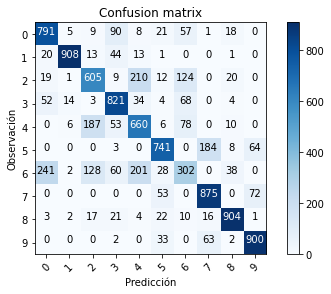

In [116]:
Y_pred_classes7 = np.argmax(predictions7, axis = 1) 
Y_true7 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx7 = confusion_matrix(Y_true7, Y_pred_classes7) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================")
plot_confusion_matrix(confusion_mtx7, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================


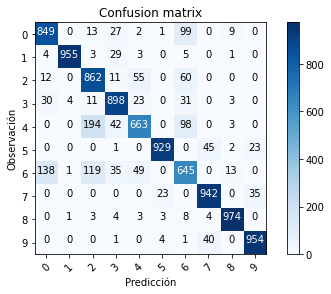

In [117]:
Y_pred_classes8 = np.argmax(predictions8, axis = 1) 
Y_true8 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx8 = confusion_matrix(Y_true8, Y_pred_classes8) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================")
plot_confusion_matrix(confusion_mtx8, classes = range(10))